In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<disgten.Generator with input: 
n_particle: 20000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_xy:
    units: mm
    value: 4
  type: rsg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 150
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: ps
    value: 25
  type: sg
total_charge:
  units: nC
  value: 1

>
Distribution format: gpt
Output file: gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 20000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 25 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0

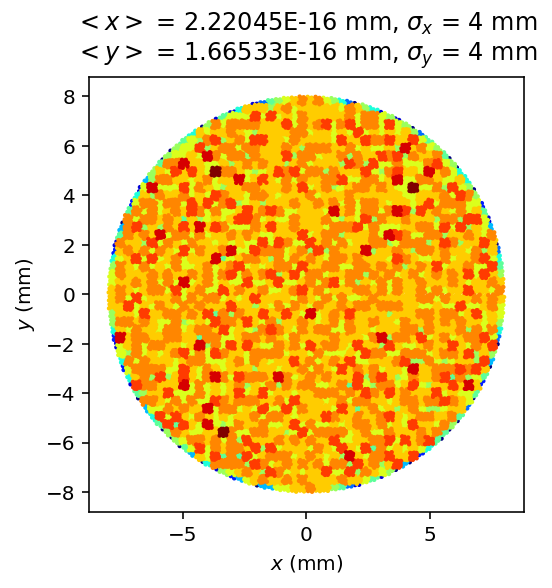

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/cu_injector/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE,verbose=True)
print(gen)
beam = gen.beam()

plot_dist2d(beam, 'x', 'mm', 'y', 'mm', nbins=50, axis='equal', title_on=True);

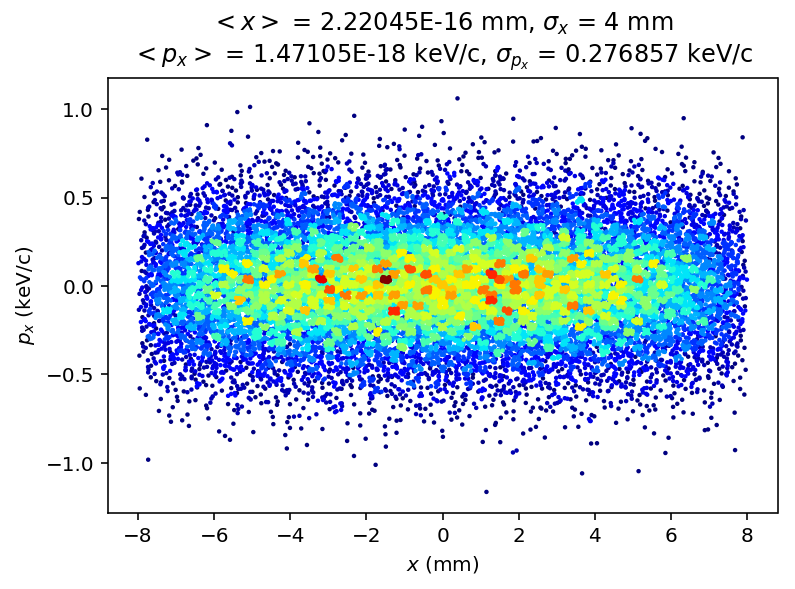

In [3]:
plot_dist2d(beam, 'x', 'mm', 'px', 'keV/c', nbins=75, title_on=True);

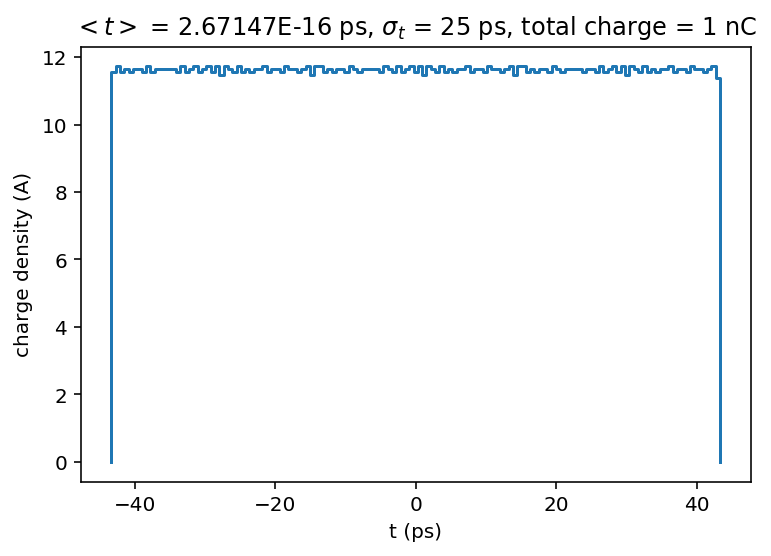

In [4]:
plot_current_profile(beam, 'ps', 'A', title_on=True)

# Run with Distgen

In [5]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [6]:
GPT_INPUT_FILE = os.path.join(root,'templates/cu_injector/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/cu_injector/distgen.in.yaml')

settings={'n_particle':200, 
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True,
                         auto_phase=True)
print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
A3Quad_1_current is in gpt
A3Quad_2_current is in gpt
A3Quad_3_current is in gpt
Linking particle files, distgen output will point to -> "gpt.particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpewaws1_m/gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 2

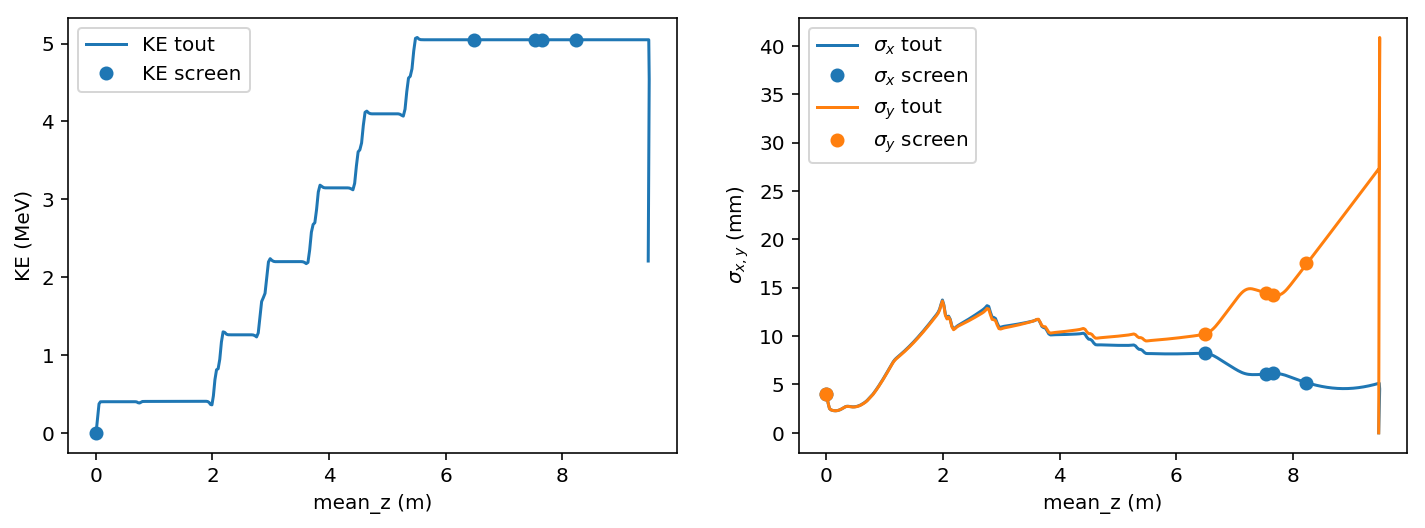

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

tzs = G.stat('mean_z','tout')
tstdx = G.stat('sigma_x','tout')
tstdy = G.stat('sigma_y','tout')
tKE = G.stat('mean_kinetic_energy','tout')

pzs = G.stat('mean_z','screen')
pstdx = G.stat('sigma_x','screen')
pstdy = G.stat('sigma_y','screen')
pKE = G.stat('mean_kinetic_energy','screen')

ax[0].plot(tzs, tKE/1e6, pzs, pKE/1e6, 'o', color='#1f77b4')
ax[0].set_xlabel('mean_z (m)');
ax[0].set_ylabel('KE (MeV)');
ax[0].legend(['KE tout','KE screen'])

ax[1].plot(tzs, tstdx*1e3, pzs, pstdx*1e3, 'o', color='#1f77b4')
ax[1].plot(tzs, tstdy*1e3, pzs, pstdy*1e3, 'o', color='#ff7f0e')         
ax[1].set_xlabel('mean_z (m)');
ax[1].set_ylabel('$\sigma_{x,y}$ (mm)');
ax[1].legend(['$\sigma_x$ tout','$\sigma_x$ screen','$\sigma_y$ tout','$\sigma_y$ screen']);

In [8]:
from gpt.gpt_distgen import evaluate_gpt_with_distgen

result = evaluate_gpt_with_distgen(settings=settings,
                               gpt_input_file=GPT_INPUT_FILE,
                               distgen_input_file=DISTGEN_INPUT_FILE,
                               verbose=True,
                               auto_phase=True)

Run GPT with Distgen:
Replacing param n_particle with value 200
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
A3Quad_1_current is in gpt
A3Quad_2_current is in gpt
A3Quad_3_current is in gpt
Linking particle files, distgen output will point to -> "gpt.particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpus79arsy/gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 2

In [9]:
result

{'error': False,
 'end_n_particle': 200,
 'end_norm_emit_x': 0.00019293754488232683,
 'end_norm_emit_y': 0.00030736565823545435,
 'end_higher_order_energy_spread': 47066.38772819264,
 'end_mean_x': -6.22070714596442e-05,
 'end_sigma_x': 0.0051999550988871155,
 'end_min_x': -0.015091595902243883,
 'end_max_x': 0.014265455061849286,
 'end_mean_y': 0.0003667053196202198,
 'end_sigma_y': 0.017513117160002416,
 'end_min_y': -0.04205820320606118,
 'end_max_y': 0.12152469060749772,
 'end_mean_z': 8.227999999999996,
 'end_sigma_z': 3.670659921754517e-15,
 'end_min_z': 8.227999999999998,
 'end_max_z': 8.228000000000002,
 'end_mean_r': 0.013192907505248975,
 'end_sigma_r': 0.012642560648837554,
 'end_min_r': 0.0004079751967144897,
 'end_max_r': 0.1215262480181381,
 'end_mean_theta': 0.1154251746806939,
 'end_sigma_theta': 1.7244433247753927,
 'end_min_theta': -3.1087052598774765,
 'end_max_theta': 3.1317783353513047,
 'end_mean_px': 97.26084011898708,
 'end_sigma_px': 21354.902248811668,
 'end_m